In [1]:
library(stm)
library(Matrix)
library(CountClust)

Loading required package: ggplot2



In [2]:
plot_factor = function(EF,k,main=NULL){
  plot(EF[,1],type='l',ylab='',xlab='base',main=main,ylim=range(EF))
  if(k>1){
    for(i in 2:k){
    lines(EF[,i],col=i,lty=i)
  }
  }
}


#'@param K number of factors to be plot
summary_study = function(fit,K,gene=NULL,method='stm'){
  # plot factors 
  p = ncol(fit$geneCounts)
  idx1 = 1:p
  if(method=='stm'){
    EF = fit$fit_stm$EF
  }
    else if (method=='sgom'){
    EF = t(fit$fit_sgom$phi)
  }else if(method=='NMF'){
    EF = t(fit$fit_NMF$H)
  }else if(method=='hals'){
    EF = t(fit$fit_hals$V)
  }
  par(mfrow=c(3,1))
  for(k in 1:K){
      rna_ymax <- max(max(EF[idx1,k]), 1e-3)
      plot(EF[idx1,k],type='l',ylab='',xlab='base',main=c(paste(gene, 'factor',k),'RNA'),col=2, ylim=c(0, rna_ymax))
    }
}


# Factors in OAS1

I ran the SGoM model with k=5, around gene OAS1.

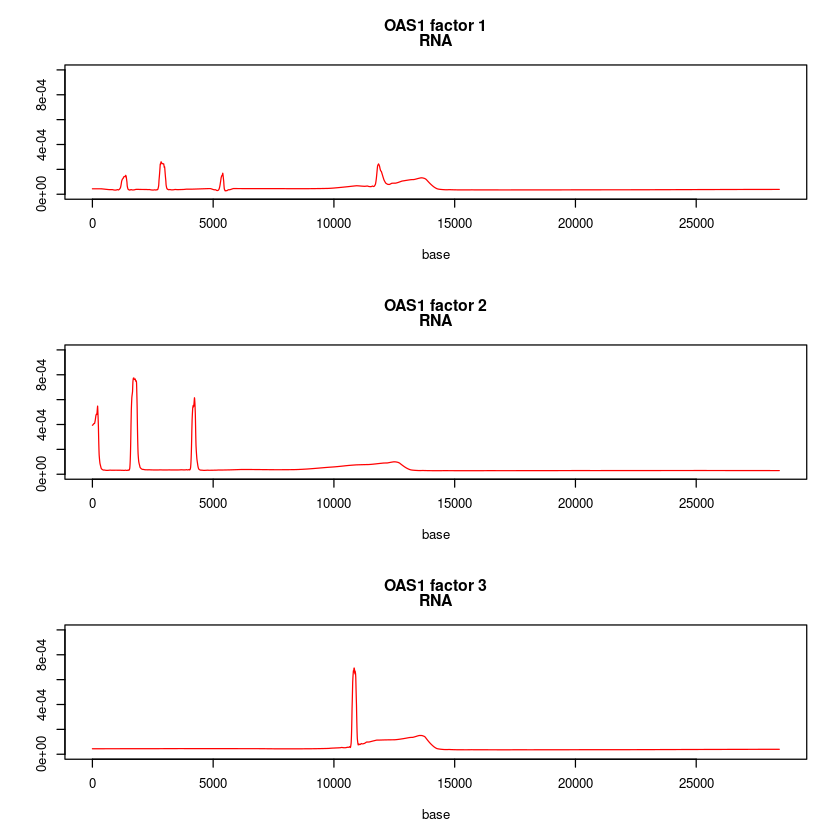

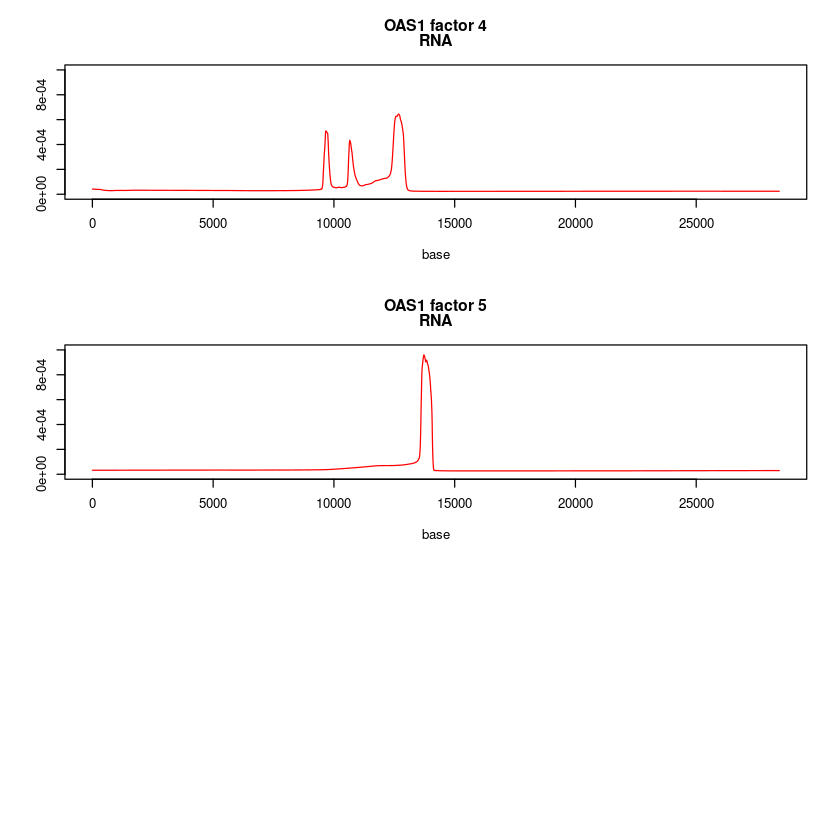

In [3]:
fit = readRDS('../../gtex_counts_old/stm_models/OAS1.sgom_K5.rds')
summary_study(fit, 5, method='sgom', gene='OAS1')

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


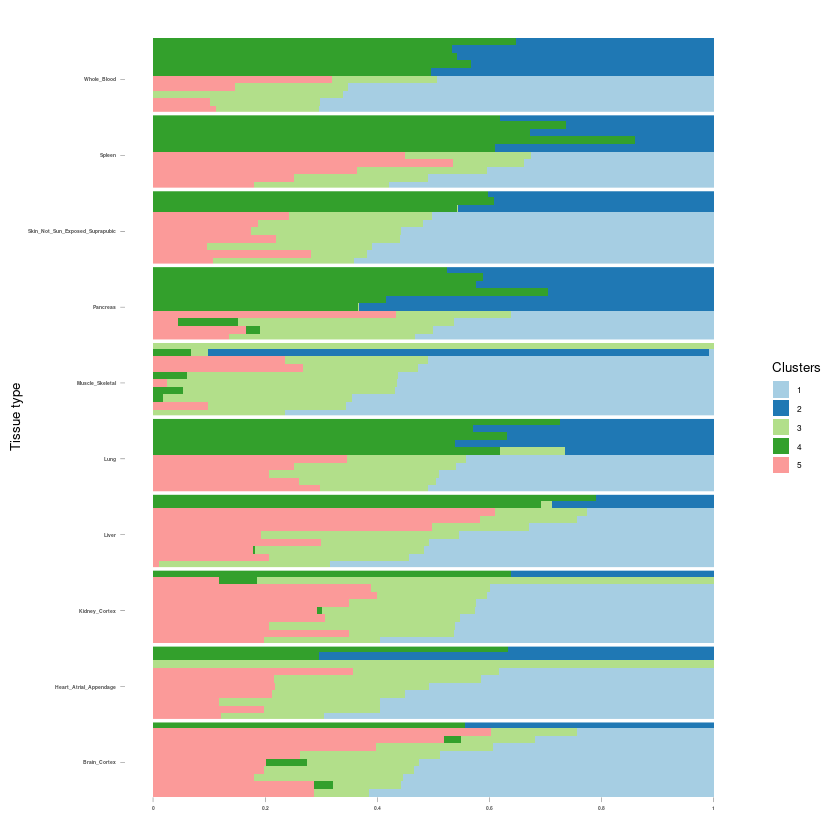

In [44]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

library(CountClust)

# row.names(fit$geneCounts) <- row.names(annotation)
# row.names(fit$fit_sgom$pi) <- row.names(annotation)

indis = row.names(fit$geneCounts)
tissue_label = c()
tissue_label <- annotation[rownames(fit$geneCounts),]$tissue_id
annotation = data.frame(sample_id = indis,tissue_label = tissue_label)
EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation,
                  palette = RColorBrewer::brewer.pal(5,  "Paired"),
                  ))

In [8]:
dim(fit$fit_sgom$pi)

[1] 100   5

In [12]:
dim(fit$fit_sgom$phi)

[1]     5 28439

In [5]:
x <- as.matrix(fit$fit_sgom$pi) %*% as.matrix(fit$fit_sgom$phi)

In [21]:
head(x)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

GTEX-11NSD-0526-SM-5A5LT,1.866297e-04,1.866418e-04,1.866592e-04,1.866836e-04,1.867189e-04,1.867612e-04,1.868085e-04,1.868595e-04,1.869149e-04,1.869757e-04,...,2.622272e-05,2.622264e-05,2.622257e-05,2.622250e-05,2.622243e-05,2.622236e-05,2.622229e-05,2.622221e-05,2.622214e-05,2.622207e-05
GTEX-1CB4I-1526-SM-7DHMY,2.897754e-04,2.897965e-04,2.898265e-04,2.898686e-04,2.899294e-04,2.900021e-04,2.900834e-04,2.901709e-04,2.902660e-04,2.903703e-04,...,2.776997e-05,2.776989e-05,2.776981e-05,2.776973e-05,2.776965e-05,2.776957e-05,2.776949e-05,2.776942e-05,2.776934e-05,2.776926e-05
GTEX-UJHI-0626-SM-3DB8T,4.235232e-05,4.235229e-05,4.235226e-05,4.235223e-05,4.235220e-05,4.235217e-05,4.235214e-05,4.235211e-05,4.235208e-05,4.235205e-05,...,3.797724e-05,3.797755e-05,3.797787e-05,3.797818e-05,3.797850e-05,3.797881e-05,3.797913e-05,3.797945e-05,3.797976e-05,3.798008e-05
GTEX-1JJE9-2926-SM-CY8HV,4.049629e-05,4.049626e-05,4.049623e-05,4.049620e-05,4.049617e-05,4.049614e-05,4.049611e-05,4.049608e-05,4.049605e-05,4.049602e-05,...,3.633940e-05,3.633970e-05,3.634000e-05,3.634030e-05,3.634060e-05,3.634090e-05,3.634119e-05,3.634149e-05,3.634179e-05,3.634209e-05
GTEX-QEL4-1226-SM-447A4,4.148304e-05,4.148302e-05,4.148299e-05,4.148296e-05,4.148293e-05,4.148291e-05,4.148288e-05,4.148285e-05,4.148283e-05,4.148280e-05,...,3.722177e-05,3.722208e-05,3.722238e-05,3.722269e-05,3.722300e-05,3.722330e-05,3.722361e-05,3.722392e-05,3.722423e-05,3.722453e-05
GTEX-POMQ-0006-SM-5SI7D,2.194064e-04,2.194214e-04,2.194428e-04,2.194728e-04,2.195162e-04,2.195682e-04,2.196263e-04,2.196889e-04,2.197569e-04,2.198315e-04,...,2.671439e-05,2.671431e-05,2.671424e-05,2.671417e-05,2.671409e-05,2.671402e-05,2.671394e-05,2.671387e-05,2.671380e-05,2.671372e-05


In [7]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

brain_samples <- rownames(x)[annotation[rownames(x),]$tissue_id == "Brain_Cortex"]
blood_samples <- rownames(x)[annotation[rownames(x),]$tissue_id == "Whole_Blood"]

In [32]:
annotation[rownames(x),]$tissue_id

[1] Pancreas                        Heart_Atrial_Appendage         
  [3] Pancreas                        Brain_Cortex                   
  [5] Liver                           Whole_Blood                    
  [7] Skin_Not_Sun_Exposed_Suprapubic Muscle_Skeletal                
  [9] Pancreas                        Heart_Atrial_Appendage         
 [11] Spleen                          Kidney_Cortex                  
 [13] Brain_Cortex                    Lung                           
 [15] Muscle_Skeletal                 Spleen                         
 [17] Lung                            Muscle_Skeletal                
 [19] Spleen                          Brain_Cortex                   
 [21] Muscle_Skeletal                 Lung                           
 [23] Muscle_Skeletal                 Liver                          
 [25] Brain_Cortex                    Liver                          
 [27] Heart_Atrial_Appendage          Brain_Cortex                   
 [29] Muscle_Skeletal                 Brain_Cortex                   
 [31] Skin_Not_Sun_Exposed_Suprapubic Lung                           
 [33] Kidney_Cortex                   Pancreas                       
 [35] Whole_Blood                     Whole_Blood                    
 [37] Whole_Blood                     Lung                           
 [39] Spleen                          Brain_Cortex                   
 [41] Pancreas                        Liver                          
 [43] Heart_Atrial_Appendage          Pancreas                       
 [45] Brain_Cortex                    Spleen                         
 [47] Whole_Blood                     Liver                          
 [49] Kidney_Cortex                   Muscle_Skeletal                
 [51] Kidney_Cortex                   Whole_Blood                    
 [53] Skin_Not_Sun_Exposed_Suprapubic Skin_Not_Sun_Exposed_Suprapubic
 [55] Heart_Atrial_Appendage          Whole_Blood                    
 [57] Liver                           Pancreas                       
 [59] Liver                           Kidney_Cortex                  
 [61] Whole_Blood                     Kidney_Cortex                  
 [63] Whole_Blood                     Skin_Not_Sun_Exposed_Suprapubic
 [65] Pancreas                        Heart_Atrial_Appendage         
 [67] Kidney_Cortex                   Heart_Atrial_Appendage         
 [69] Spleen                          Liver                          
 [71] Skin_Not_Sun_Exposed_Suprapubic Whole_Blood                    
 [73] Heart_Atrial_Appendage          Lung                           
 [75] Liver                           Spleen                         
 [77] Brain_Cortex                    Spleen                         
 [79] Skin_Not_Sun_Exposed_Suprapubic Liver                          
 [81] Heart_Atrial_Appendage          Heart_Atrial_Appendage         
 [83] Kidney_Cortex                   Kidney_Cortex                  
 [85] Pancreas                        Skin_Not_Sun_Exposed_Suprapubic
 [87] Muscle_Skeletal                 Kidney_Cortex                  
 [89] Pancreas                        Lung                           
 [91] Spleen                          Spleen                         
 [93] Lung                            Skin_Not_Sun_Exposed_Suprapubic
 [95] Brain_Cortex                    Lung                           
 [97] Skin_Not_Sun_Exposed_Suprapubic Muscle_Skeletal                
 [99] Lung                            Muscle_Skeletal                
54 Levels: Adipose_Subcutaneous Adipose_Visceral_Omentum ... Whole_Blood

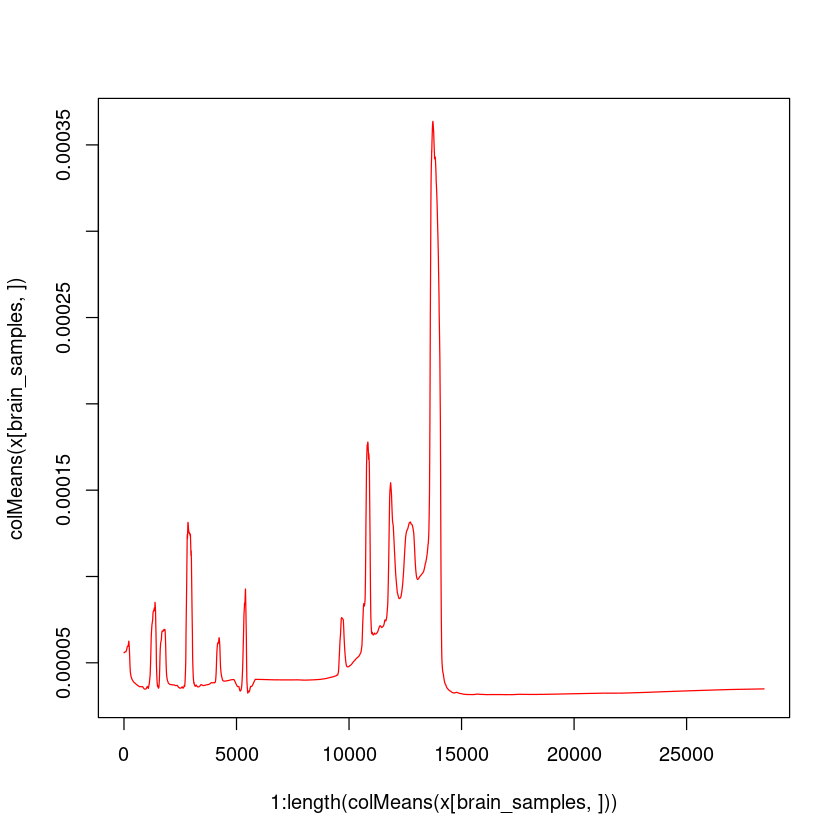

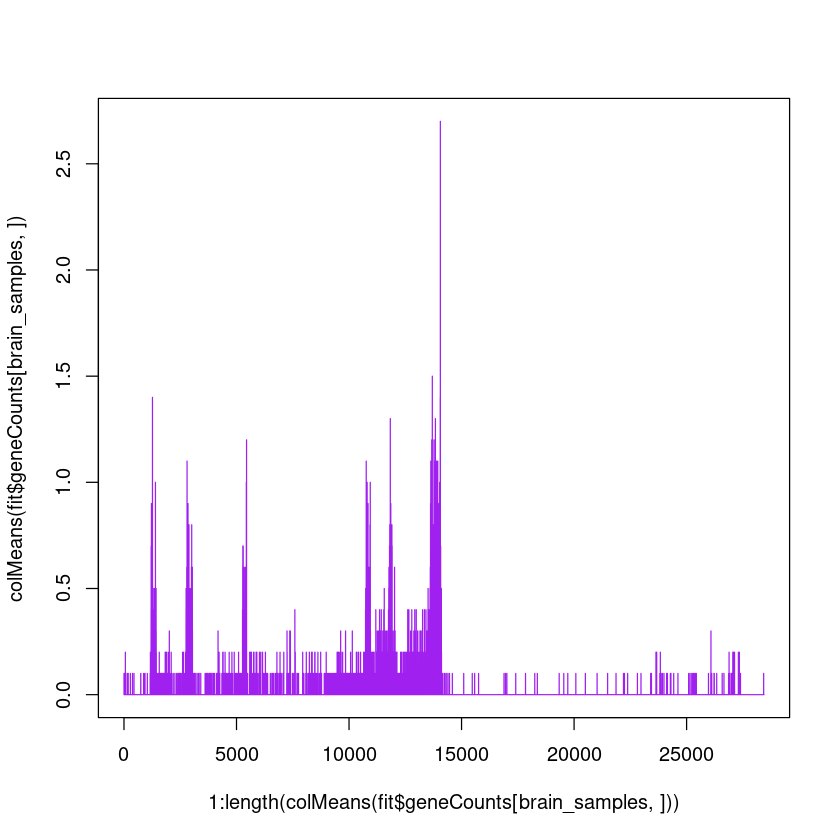

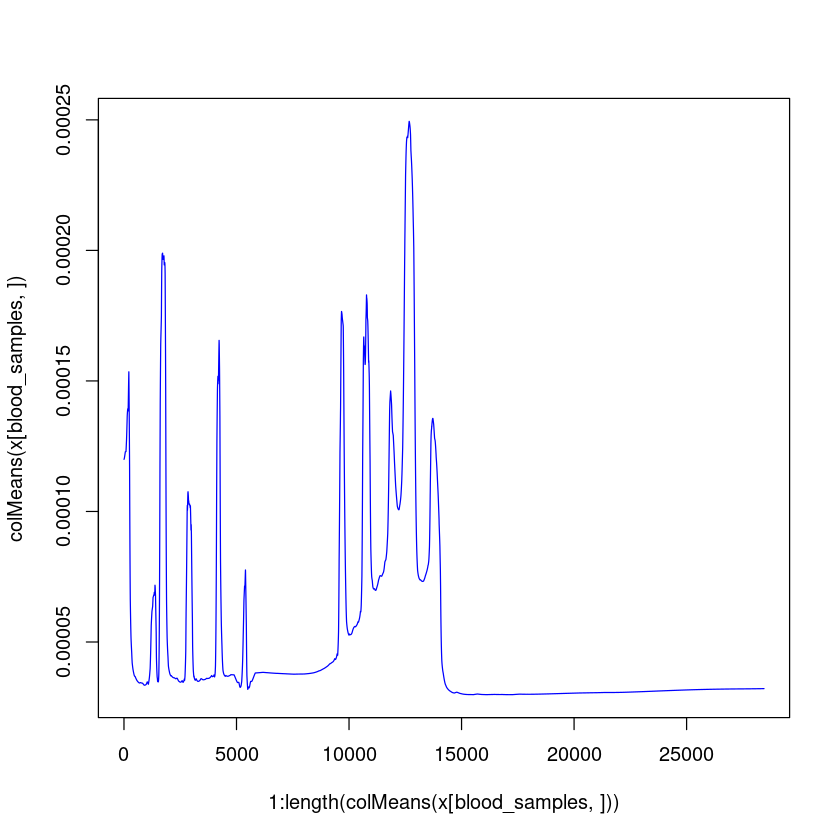

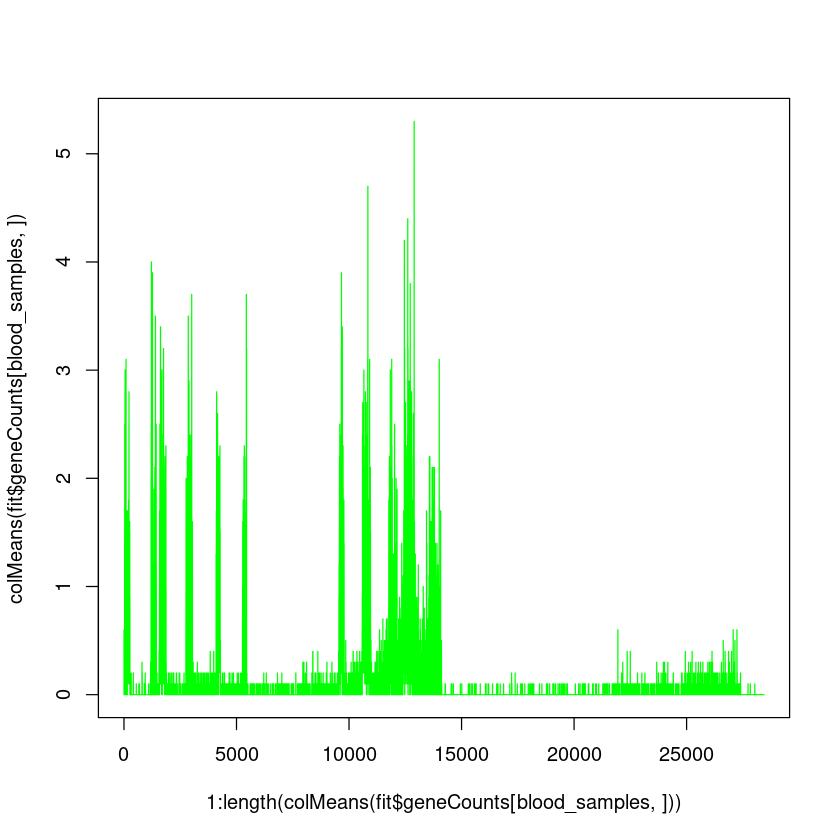

In [8]:
plot(1:length(colMeans(x[brain_samples,])),
     colMeans(x[brain_samples,]),type='l', col='red')


plot(1:length(colMeans(fit$geneCounts[brain_samples,])),
     colMeans(fit$geneCounts[brain_samples,]),type='l', col='purple')


plot(1:length(colMeans(x[blood_samples,])),
     colMeans(x[blood_samples,]),type='l', col='blue')

plot(1:length(colMeans(fit$geneCounts[blood_samples,])),
     colMeans(fit$geneCounts[blood_samples,]),type='l', col='green')

In [9]:
colnames(x) <- colnames(fit$geneCounts)
write.table(x[brain_samples,], '../../plots/stm_plots/brain_stm.tab', sep='\t', quote=FALSE)

colnames(x) <- colnames(fit$geneCounts)
write.table(x[blood_samples,], '../../plots/stm_plots/blood_stm.tab', sep='\t', quote=FALSE)

In [61]:
rownames(fit$geneCounts)

[1] "GTEX-11NSD-0526-SM-5A5LT" "GTEX-1CB4I-1526-SM-7DHMY"
  [3] "GTEX-UJHI-0626-SM-3DB8T"  "GTEX-1JJE9-2926-SM-CY8HV"
  [5] "GTEX-QEL4-1226-SM-447A4"  "GTEX-POMQ-0006-SM-5SI7D" 
  [7] "GTEX-Y114-2126-SM-4TT8B"  "GTEX-17F9E-0226-SM-79OKK"
  [9] "GTEX-UJMC-1126-SM-3GADP"  "GTEX-1HCU7-1226-SM-B2LX8"
 [11] "GTEX-RUSQ-0126-SM-47JWV"  "GTEX-1MUQO-2526-SM-E9TJN"
 [13] "GTEX-15SHU-3126-SM-6M46H" "GTEX-15RJ7-0626-SM-6M47V"
 [15] "GTEX-11TT1-2326-SM-5GU6N" "GTEX-ZLFU-0526-SM-4WWBN" 
 [17] "GTEX-15D1Q-0526-SM-6AJAY" "GTEX-PLZ4-0926-SM-2S1OI" 
 [19] "GTEX-1J8QM-0926-SM-C1YQ9" "GTEX-17HG3-2926-SM-79ON8"
 [21] "GTEX-11ZVC-2726-SM-5FQSZ" "GTEX-1MCC2-0726-SM-EV7AL"
 [23] "GTEX-RU72-1326-SM-2TF6T"  "GTEX-131YS-1626-SM-5HL6C"
 [25] "GTEX-183WM-2826-SM-731C2" "GTEX-ZYY3-0626-SM-5NQ6W" 
 [27] "GTEX-1399T-0726-SM-5J1MH" "GTEX-14C5O-3026-SM-5YYB2"
 [29] "GTEX-1PPH8-0326-SM-E76PR" "GTEX-11OF3-2926-SM-5HL78"
 [31] "GTEX-1HB9E-0126-SM-CM2S5" "GTEX-1H1CY-0626-SM-9KNVE"
 [33] "GTEX-1JMQJ-1726-SM-E9U4V" "GTEX-Q2AH-0926-SM-48TZK" 
 [35] "GTEX-X88G-0006-SM-47JX5"  "GTEX-14PN4-0005-SM-7PC21"
 [37] "GTEX-1J8Q3-0005-SM-CNNOY" "GTEX-QDT8-0926-SM-32PL2" 
 [39] "GTEX-VJYA-0126-SM-4KL1P"  "GTEX-1F7RK-1826-SM-7RHI4"
 [41] "GTEX-Y5LM-0526-SM-4V6G3"  "GTEX-ZAB4-0826-SM-5LU9D" 
 [43] "GTEX-11EMC-0826-SM-59862" "GTEX-144GN-0826-SM-5LU5G"
 [45] "GTEX-N7MT-1126-SM-CYPQY"  "GTEX-P78B-1226-SM-EZ6KP" 
 [47] "GTEX-1OJC4-0005-SM-DKPQ4" "GTEX-YFC4-1526-SM-5IFJS" 
 [49] "GTEX-1PWST-2226-SM-EVR3G" "GTEX-ZE9C-2326-SM-5J1NT" 
 [51] "GTEX-1GTWX-1826-SM-9QEHG" "GTEX-13S7M-0005-SM-5NQ76"
 [53] "GTEX-1GN1V-2826-SM-9JGIA" "GTEX-1F6RS-2026-SM-7RHHC"
 [55] "GTEX-ZVT4-1326-SM-5NQ8E"  "GTEX-WXYG-0005-SM-3NB3M" 
 [57] "GTEX-145LU-1326-SM-5LU9N" "GTEX-ZPCL-0726-SM-DO91S" 
 [59] "GTEX-144GM-1326-SM-5LU5E" "GTEX-11TTK-1926-SM-5PNW8"
 [61] "GTEX-1GN73-0005-SM-ACKVI" "GTEX-1GMR3-2426-SM-7MXV2"
 [63] "GTEX-T6MO-0006-SM-32QOU"  "GTEX-11DZ1-2426-SM-5GZZX"
 [65] "GTEX-13N11-0226-SM-5KM3C" "GTEX-145LV-0226-SM-5S2QG"
 [67] "GTEX-QDVN-1626-SM-48TZC"  "GTEX-YEC4-0226-SM-4W1YG" 
 [69] "GTEX-P4PP-0926-SM-48TBZ"  "GTEX-14C38-1526-SM-5RQJ7"
 [71] "GTEX-1IDJI-0126-SM-CMKHS" "GTEX-15RJ7-0006-SM-7RHHM"
 [73] "GTEX-X62O-0826-SM-46MW8"  "GTEX-1C6VS-1226-SM-79OO2"
 [75] "GTEX-11DXZ-0126-SM-5EGGY" "GTEX-WHWD-0126-SM-4OORS" 
 [77] "GTEX-13OVH-3026-SM-5MR4N" "GTEX-YFCO-0926-SM-5LUA5" 
 [79] "GTEX-1S5ZU-2526-SM-E6CIF" "GTEX-1JMLX-1326-SM-CXZJO"
 [81] "GTEX-WFG7-0826-SM-3GIKU"  "GTEX-13NYS-1926-SM-5IJCB"
 [83] "GTEX-13112-2126-SM-5GCO4" "GTEX-1JMPZ-1226-SM-ARU8Y"
 [85] "GTEX-1OKEX-1726-SM-E9U4F" "GTEX-145MO-2826-SM-5LU96"
 [87] "GTEX-ZT9X-1826-SM-57WDU"  "GTEX-XPVG-0526-SM-4B65N" 
 [89] "GTEX-1H1DG-1426-SM-9OSXP" "GTEX-P78B-0926-SM-2I5FA" 
 [91] "GTEX-U4B1-0526-SM-4DXTK"  "GTEX-13N11-0126-SM-5KM2Z"
 [93] "GTEX-183FY-0726-SM-793C3" "GTEX-ZDYS-2426-SM-4WKGI" 
 [95] "GTEX-11DXY-3226-SM-5GIDE" "GTEX-13NYS-1626-SM-5J2MU"
 [97] "GTEX-11DYG-1526-SM-5A5JS" "GTEX-ZVP2-2126-SM-5GU6E" 
 [99] "GTEX-QCQG-0326-SM-2I3ES"  "GTEX-15DDE-0526-SM-6ETZQ"

In [157]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)


In [162]:
indis = row.names(fit$geneCounts)

In [179]:
dim(annotation)

[1] 100   2

In [189]:
annotation = read.table('../../gtex_download/sample.tsv', sep='\t', header=1, row.names=1)

annotation['GTEX-1H1ZS-3026-SM-9KNUJ',]

,bam_file,bam_index,participant,tissue_id,tissue_site_detail
,<fct>,<fct>,<fct>,<fct>,<fct>
GTEX-1H1ZS-3026-SM-9KNUJ,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_RNAseq_BAM_files/GTEX-1H1ZS-3026-SM-9KNUJ.Aligned.sortedByCoord.out.patched.md.bam,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da62108/GTEx_Analysis_2017-06-05_v8_RNAseq_BAM_files/GTEX-1H1ZS-3026-SM-9KNUJ.Aligned.sortedByCoord.out.patched.md.bam.bai,GTEX-1H1ZS,Brain_Cortex,Brain - Cortex


In [194]:
table(annotation[rownames(fit$geneCounts),]$tissue_id)


                 Adipose_Subcutaneous              Adipose_Visceral_Omentum 
                                    0                                     0 
                        Adrenal_Gland                          Artery_Aorta 
                                    0                                     0 
                      Artery_Coronary                         Artery_Tibial 
                                    0                                     0 
                              Bladder                        Brain_Amygdala 
                                    0                                     0 
 Brain_Anterior_cingulate_cortex_BA24           Brain_Caudate_basal_ganglia 
                                    0                                     0 
          Brain_Cerebellar_Hemisphere                      Brain_Cerebellum 
                                    0                                     0 
                         Brain_Cortex              Brain_Frontal_Cortex_BA9

Warning message:
“Use of `df_mlt$document` is discouraged. Use `document` instead.”
Warning message:
“Use of `df_mlt$value` is discouraged. Use `value` instead.”
Warning message:
“Use of `df_mlt$topic` is discouraged. Use `topic` instead.”


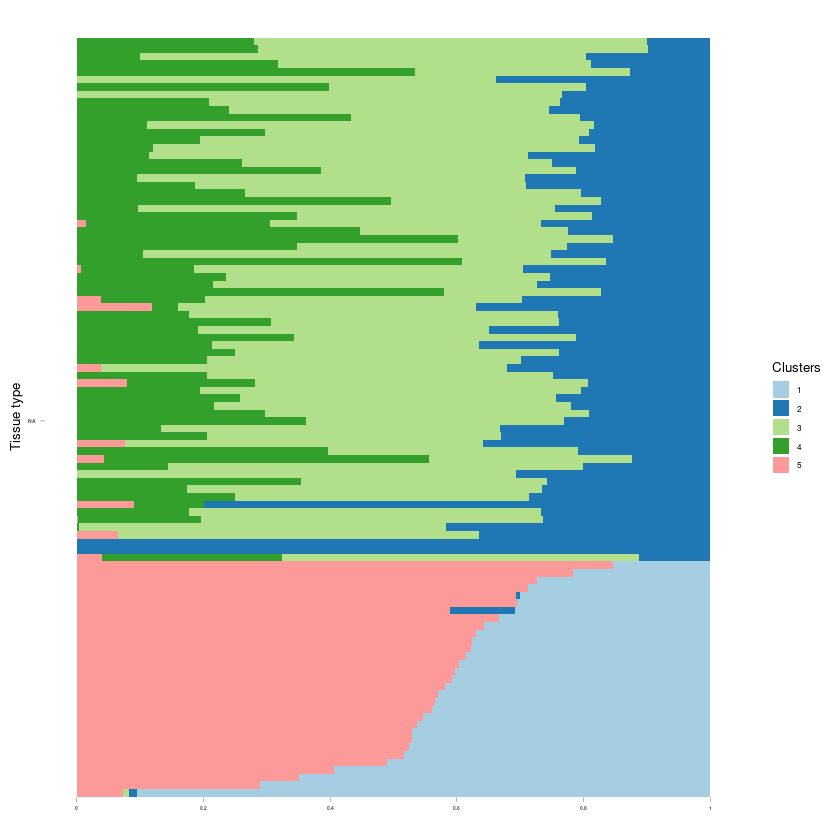

In [115]:
annotation = read.table('../../gtex_download/sample.100.tab.gz', sep='\t', header=1, row.names=1)

library(CountClust)

row.names(fit$geneCounts) <- row.names(annotation)
row.names(fit$fit_sgom$pi) <- row.names(annotation)

indis = rownames(fit$geneCounts)
 tissue_label = c()
 for(i in 1:length(indis)){
   tissue_label[i] <- annotation$tissue_id[i]
 }
annotation = annotation = read.table('../../gtex_download/sample.100.tab.gz', sep='\t', header=1, row.names=1)

EL = fit$fit_sgom$pi
print(StructureGGplot(EL,annotation = annotation$tissue_id,
                  palette = RColorBrewer::brewer.pal(5,  "Paired"),
                  ))